# Hierarchical Clustering Analysis

## 1. Data Loading and Exploration

In this section, we load the income dataset and explore its structure. The dataset contains information about individuals including their names, ages, and income levels.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel('income.xlsx', names=["name", "age", "income"])
df

,name,age,income
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87
5,David,48,68
6,Ismail,31,80
7,Sheela,55,60


## 2. Initial Data Visualization

We create a scatter plot to visualize the relationship between age and income. This helps us understand the data distribution before applying clustering algorithms.


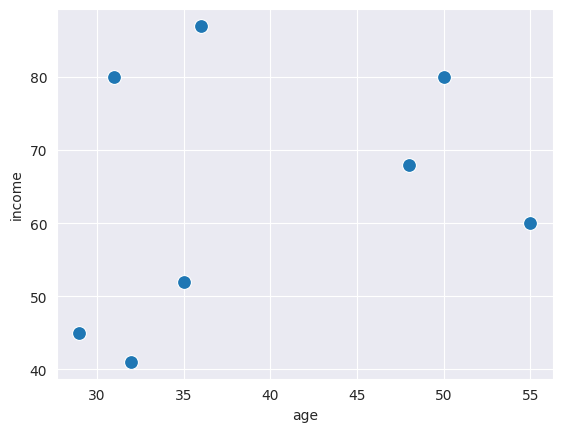

In [5]:
sns.scatterplot(df, x='age', y='income', s=100)
plt.show()

## 3. Hierarchical Clustering Implementation

### Using AgglomerativeClustering from Scikit-learn

We implement hierarchical clustering using the `AgglomerativeClustering` class:
- **n_clusters=3**: We specify that we want 3 clusters
- **linkage='ward'**: We use Ward linkage, which minimizes within-cluster variance
- **Features**: We use 'age' and 'income' as our clustering features

The algorithm assigns each data point to one of the three clusters based on similarity.


In [6]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc.fit(df[['age', 'income']])
hc.labels_

array([1, 0, 1, 1, 2, 0, 2, 0])

## 4. Adding Cluster Labels to Dataset

We add the cluster assignments back to our original dataframe to see which cluster each person belongs to. This allows us to analyze the characteristics of each cluster.


In [7]:
df['Cluster'] = hc.labels_
df

,name,age,income,Cluster
0,Rob,29,45,1
1,Andrea,50,80,0
2,Mohan,35,52,1
3,Michael,32,41,1
4,Kory,36,87,2
5,David,48,68,0
6,Ismail,31,80,2
7,Sheela,55,60,0


## 5. Visualizing Clustering Results

We create a colored scatter plot where each cluster is represented by a different color. This visualization helps us:
- Understand how the algorithm grouped similar data points
- Validate that the clustering makes intuitive sense
- Identify potential patterns in the data


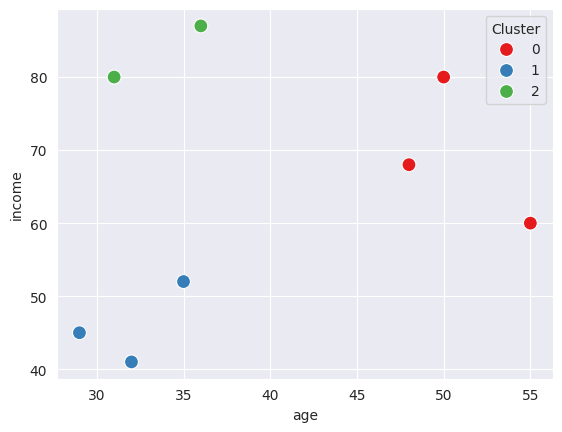

In [9]:
sns.scatterplot(df, x='age', y='income', hue='Cluster', s=100, palette='Set1')
plt.show()

## 6. Advanced Hierarchical Clustering with SciPy

### Creating Linkage Matrix

We use SciPy's hierarchical clustering functions for more detailed analysis:
- **linkage()**: Creates a linkage matrix showing how clusters are formed
- **method='average'**: Uses average linkage (UPGMA method)
- The linkage matrix contains information about cluster merging at each step


In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X = df[['age', 'income']]
Z = linkage(X, method='average')
Z

array([[ 0.        ,  3.        ,  5.        ,  2.        ],
       [ 4.        ,  6.        ,  8.60232527,  2.        ],
       [ 2.        ,  8.        , 10.31064935,  3.        ],
       [ 5.        ,  7.        , 10.63014581,  2.        ],
       [ 1.        , 11.        , 16.39052659,  3.        ],
       [ 9.        , 12.        , 23.69824661,  5.        ],
       [10.        , 13.        , 33.65863823,  8.        ]])

## 7. Dendrogram - Hierarchical Tree Visualization

### Understanding the Dendrogram

The dendrogram is a tree-like diagram that shows:
- **Vertical axis (Distance)**: Measures dissimilarity between clusters
- **Horizontal axis**: Individual data points (labeled with names)
- **Tree structure**: Shows the order in which clusters are merged
- **Height of branches**: Indicates the distance at which clusters are combined

**How to read it:**
- Lower branches represent more similar data points
- Higher branches show where larger, more dissimilar clusters are merged
- You can determine the optimal number of clusters by looking for large jumps in distance


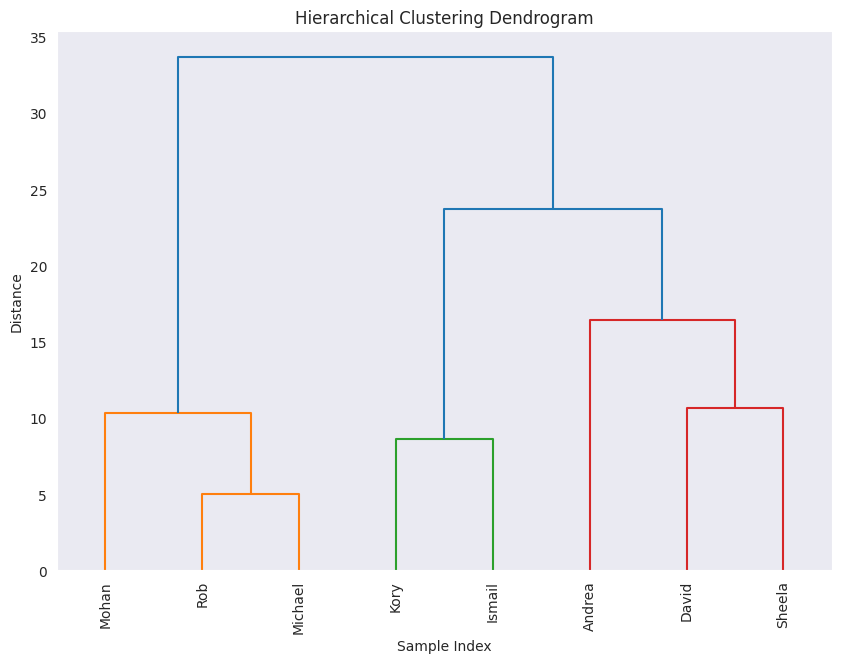

In [13]:
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=df['name'].values, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid()
plt.show()

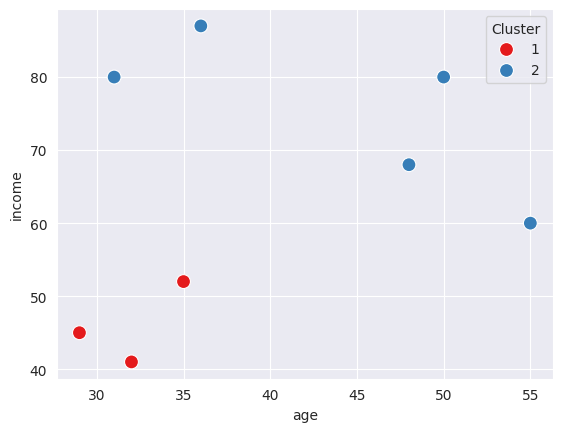

In [28]:
sns.scatterplot(df, x='age', y='income', hue='Cluster', s=100, palette='Set1')
plt.show()